# **Predicting Future Healthcare Reimbursements**

**Problem Statement:**

The healthcare organization aims to develop a predictive model for forecasting Medicare reimbursements. The objective is to enable **proactive resource allocation and budget planning in healthcare organizations**, ultimately leading to informed decision-making and improved patient outcomes. By accurately predicting future reimbursements based on historical data and external factors, the organization seeks to support healthcare providers and policymakers in making informed decisions and enhancing healthcare analytics.

**Objective:**

The primary objective of this project is to develop a robust predictive model for **forecasting future Medicare reimbursements.** This model will leverage historical data and external factors to accurately predict future reimbursements, thereby enabling strategic decision-making in healthcare organizations. The ultimate goal is to **empower healthcare providers and policymakers to make informed decisions that drive positive change and enhance patient outcomes**. By facilitating** proactive resource allocation and budget planning**, the predictive model aims to contribute to improved healthcare analytics and decision-making processes.

The organization's focus on developing a predictive model aligns with the broader industry trends and the growing importance of data-driven approaches in healthcare. Leveraging advanced analytics and predictive modeling techniques, the organization aims to address the challenges of budget planning and resource allocation, ultimately contributing to improved patient care and operational efficiency.

### **Installing streamlit library before importing as it not a default library from colab**

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st

## **1. Import necessary libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

## **2. Data Pre-processing**

## **Reading a CSV file into a DataFrame using pandas**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Cleaned_Data_county (1).csv')
df

,County ID,County name,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014),Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1001,AL-Autauga County,"4,649","9,859","4,053","2,539","1,949",477,628,233.0,NaN,NaN,NaN
1,1003,AL-Baldwin County,"22,607","9,413","3,696","2,847","1,519",682,451,227.0,NaN,NaN,NaN
2,1005,AL-Barbour County,"3,037","10,117","4,168","2,610","1,770",628,731,235.0,NaN,NaN,NaN
3,1007,AL-Bibb County,"1,839","10,817","4,740","2,669","1,809",968,483,193.0,NaN,NaN,NaN
4,1009,AL-Blount County,"4,408","10,036","4,230","2,764","1,564",611,682,229.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,56039,WY-Teton County,"2,268","7,114","2,748","2,183","1,595",194,128,159.0,NaN,NaN,NaN
3140,56041,WY-Uinta County,"1,709","7,857","3,616","1,819","1,382",524,215,306.0,NaN,NaN,NaN
3141,56043,WY-Washakie County,"1,465","8,015","3,922","1,613","2,003",129,NaN,294.0,NaN,NaN,NaN
3142,56045,WY-Weston County,"1,092","7,638","3,454","1,453","2,148",246,NaN,336.0,NaN,NaN,NaN


## **Finding the shape and size of the dataset**

In [ ]:
df.shape

(3144, 13)

In [ ]:
df.size

40872

We found 3144 rows and 13 columns in the given dataset. Based on given columns, **12th and 13th columns** which can be **dropped** from the entire table as it **contains null values**. Reducing the size of the dataset will increase the speed of training and testing process especially applied when dataset is big. Will **contribute more in increasing the accuracy of the model**.

No of cells is **40872** before dropping the null values

## **3.Dimensionality reduction**

## **Dropping the columns with only null values**

In [ ]:
df=df.drop(['Unnamed: 10','Unnamed: 11','Unnamed: 12'],axis=1)
df.head()

,County ID,County name,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014)
0,1001,AL-Autauga County,"4,649","9,859","4,053","2,539","1,949",477,628,233.0
1,1003,AL-Baldwin County,"22,607","9,413","3,696","2,847","1,519",682,451,227.0
2,1005,AL-Barbour County,"3,037","10,117","4,168","2,610","1,770",628,731,235.0
3,1007,AL-Bibb County,"1,839","10,817","4,740","2,669","1,809",968,483,193.0
4,1009,AL-Blount County,"4,408","10,036","4,230","2,764","1,564",611,682,229.0


**Shape and size of data after removing columns with null values**

In [ ]:
df.shape

(3144, 10)

In [ ]:
df.size

31440

Now the number of rows and columns got **reduced** to **3144 rows and 10 columns**

No of cells **reduced** to **31440**

The reduction of **data size by 23%** after removing columns with null values is a critical step in our data preprocessing, as it not only optimizes the **computational efficiency** of our analysis but also ensures that our insights are based on a more complete and **reliable dataset**. This streamlined approach allows for more focused and **accurate modeling and analysis**, ultimately leading to more robust and meaningful results.

## **Exploring Data Types Using Key-Value Grouping**

In [ ]:
for k,v in df.groupby(df.dtypes,axis=1):
  print(k, v.columns)

int64 Index(['County ID'], dtype='object')
float64 Index(['Durable medical equipment reimbursements per enrollee (2014)'], dtype='object')
object Index(['County name', 'Medicare enrollees (2014)',
       'Total Medicare reimbursements per enrollee (2014)',
       'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
       'Physician reimbursements per enrollee (2014)',
       'Outpatient facility reimbursements per enrollee (2014)',
       'Home health agency reimbursements per enrollee (2014)',
       'Hospice reimbursements per enrollee (2014)'],
      dtype='object')


In [ ]:
columns = ['Medicare enrollees (2014)',
    'Total Medicare reimbursements per enrollee (2014)',
           'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
           'Physician reimbursements per enrollee (2014)',
           'Outpatient facility reimbursements per enrollee (2014)',
           'Home health agency reimbursements per enrollee (2014)',
       'Hospice reimbursements per enrollee (2014)']

data_types = df[columns].dtypes
data_types

Medicare enrollees (2014)                                                 object
Total Medicare reimbursements per enrollee (2014)                         object
Hospital & skilled nursing facility reimbursements per enrollee (2014)    object
Physician reimbursements per enrollee (2014)                              object
Outpatient facility reimbursements per enrollee (2014)                    object
Home health agency reimbursements per enrollee (2014)                     object
Hospice reimbursements per enrollee (2014)                                object
dtype: object

The columns pertaining to Medicare enrollees and reimbursements, despite **containing numerical values**, are currently **represented as string data types** when examining the data types. This discrepancy may arise from the presence of non-numeric characters or formatting issues within the data. To address this, it is crucial to ensure that the **data is accurately represented as numerical values for effective analysis and interpretation**. By employing appropriate data manipulation techniques, such as **removing non-numeric characters** and converting the data type to numeric, the integrity of the data can be preserved, allowing for precise and meaningful analysis. This process involves meticulous attention to detail and adherence to best practices in data handling to **ensure the accurate representation of the numerical values within the specified columns.**

The reason for showing it as string is becuase of the existence of  **","**  in each column.

Let's **remove  ","  from each column to convert them to numerical values**.

In [ ]:
for column in columns:
    df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

# Check the data types again
data_types = df[columns].dtypes
data_types

Medicare enrollees (2014)                                                   int64
Total Medicare reimbursements per enrollee (2014)                         float64
Hospital & skilled nursing facility reimbursements per enrollee (2014)    float64
Physician reimbursements per enrollee (2014)                              float64
Outpatient facility reimbursements per enrollee (2014)                    float64
Home health agency reimbursements per enrollee (2014)                     float64
Hospice reimbursements per enrollee (2014)                                float64
dtype: object

After **removing the comma**, the output is returned as a float data type. This means that the result of the **operation is being interpreted as a floating-point number in the programming context**. When a comma is removed from a numerical value, it typically signifies a **change from a string or other data type to a numerical value**, and in this case, a float data type is returned.

In [ ]:
df.describe()

,County ID,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014)
count,3144.000000,3.144000e+03,3142.000000,3130.000000,3142.000000,3142.000000,2996.000000,2879.000000,3139.000000
mean,30412.551845,1.660135e+04,9396.717059,4257.754313,2207.737747,1903.842775,498.945928,377.455366,204.753425
std,15213.041728,4.656974e+05,1497.242911,898.005192,533.657657,577.088133,358.450562,215.442283,56.828617
min,1001.000000,1.000000e+01,4443.000000,1651.000000,818.000000,664.000000,24.000000,13.000000,15.000000
25%,18178.500000,1.406000e+03,8393.500000,3651.000000,1834.000000,1503.250000,265.750000,222.000000,169.000000
50%,29178.000000,2.943000e+03,9350.000000,4189.000000,2204.500000,1790.000000,408.500000,338.000000,198.000000
75%,45083.500000,7.256500e+03,10275.500000,4775.750000,2550.000000,2162.000000,619.750000,497.000000,232.000000
max,99999.000000,2.609794e+07,18390.000000,11739.000000,4622.000000,5702.000000,3023.000000,1842.000000,634.000000


In [ ]:
for k,v in df.groupby(df.dtypes,axis=1):
  print(k, v.columns)

int64 Index(['County ID', 'Medicare enrollees (2014)'], dtype='object')
float64 Index(['Total Medicare reimbursements per enrollee (2014)',
       'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
       'Physician reimbursements per enrollee (2014)',
       'Outpatient facility reimbursements per enrollee (2014)',
       'Home health agency reimbursements per enrollee (2014)',
       'Hospice reimbursements per enrollee (2014)',
       'Durable medical equipment reimbursements per enrollee (2014)'],
      dtype='object')
object Index(['County name'], dtype='object')


When handling float values in the specified columns, it is essential to ensure **accurate representation without decimal points**. To achieve this, the null values within the columns can be **replaced with the median value based on given nature of this dataset**, and subsequently, the **float values can be converted to integers**. This process involves utilizing the **fillna()** method to replace null values with the median, followed by the use of the** astype(int)** method to convert the float values to integers. By implementing this approach, the **integrity of the data is maintained**, and the columns are effectively handled to reflect integer values, thus ensuring precision and accuracy in the representation of the data.

In [ ]:
columns_to_convert = ['Total Medicare reimbursements per enrollee (2014)',
                      'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
                      'Physician reimbursements per enrollee (2014)',
                      'Outpatient facility reimbursements per enrollee (2014)',
                      'Home health agency reimbursements per enrollee (2014)',
                      'Hospice reimbursements per enrollee (2014)',
                      'Durable medical equipment reimbursements per enrollee (2014)']

# Treat null values with the median
df[columns_to_convert] = df[columns_to_convert].fillna(df[columns_to_convert].median())

# Convert float values to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [ ]:
for k,v in df.groupby(df.dtypes,axis=1):
  print(k, v.columns)

int64 Index(['County ID', 'Medicare enrollees (2014)',
       'Total Medicare reimbursements per enrollee (2014)',
       'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
       'Physician reimbursements per enrollee (2014)',
       'Outpatient facility reimbursements per enrollee (2014)',
       'Home health agency reimbursements per enrollee (2014)',
       'Hospice reimbursements per enrollee (2014)',
       'Durable medical equipment reimbursements per enrollee (2014)'],
      dtype='object')
object Index(['County name'], dtype='object')


In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

## **Checking null values in each column**

In [ ]:
df.isnull().sum()

County ID                                                                 0
County name                                                               0
Medicare enrollees (2014)                                                 0
Total Medicare reimbursements per enrollee (2014)                         0
Hospital & skilled nursing facility reimbursements per enrollee (2014)    0
Physician reimbursements per enrollee (2014)                              0
Outpatient facility reimbursements per enrollee (2014)                    0
Home health agency reimbursements per enrollee (2014)                     0
Hospice reimbursements per enrollee (2014)                                0
Durable medical equipment reimbursements per enrollee (2014)              0
dtype: int64

In [ ]:
df.describe()

,County ID,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014)
count,3144,3144,3144,3144,3144,3144,3144,3144,3144
mean,30413,16601,9397,4257,2208,1904,495,374,205
std,15213,465697,1497,896,533,577,350,206,57
min,1001,10,4443,1651,818,664,24,13,15
25%,18178,1406,8394,3655,1834,1504,273,235,169
50%,29178,2943,9350,4189,2204,1790,408,338,198
75%,45084,7256,10274,4773,2550,2162,606,481,232
max,99999,26097945,18390,11739,4622,5702,3023,1842,634


## **Dealing with Outliers**

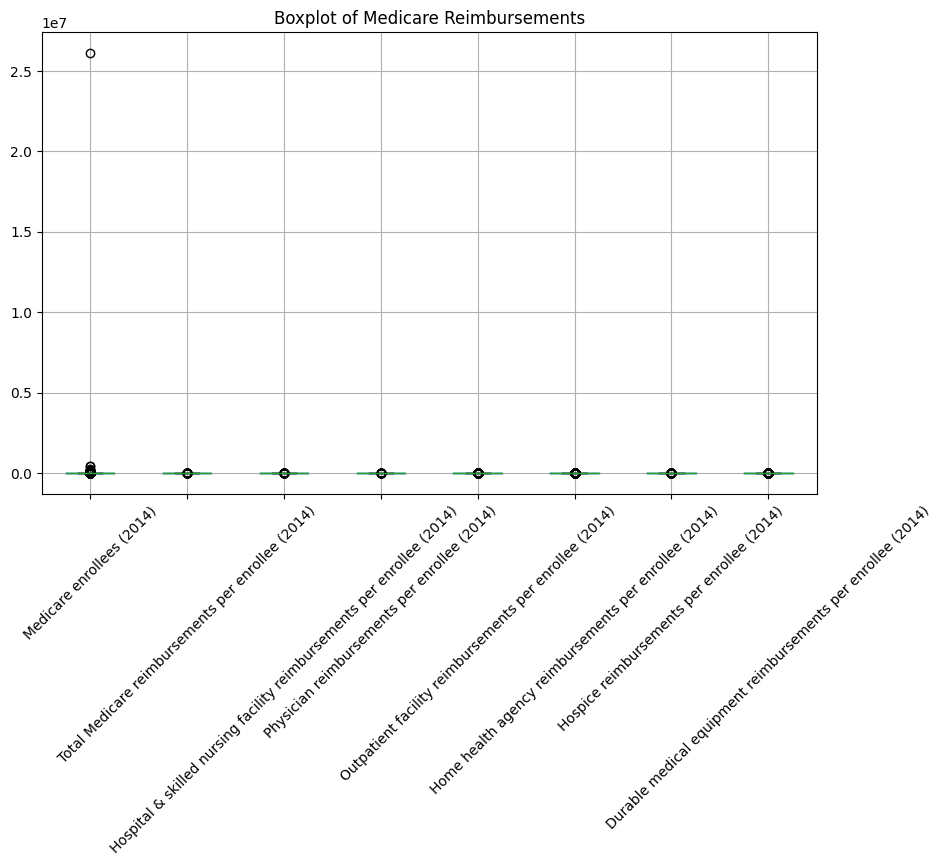

In [ ]:
columns_to_check = ['Medicare enrollees (2014)', 'Total Medicare reimbursements per enrollee (2014)',
                    'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
                    'Physician reimbursements per enrollee (2014)', 'Outpatient facility reimbursements per enrollee (2014)',
                    'Home health agency reimbursements per enrollee (2014)', 'Hospice reimbursements per enrollee (2014)',
                    'Durable medical equipment reimbursements per enrollee (2014)']
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplot of Medicare Reimbursements')
plt.xticks(rotation=45)
plt.show()

Here, we have one outlier at mediacre enrollees column. So let's drop the last row.

In [ ]:
df = df.iloc[:-1]

Let's check if the outlier exists.

In [ ]:
df.describe()

,County ID,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014)
count,3143,3143,3143,3143,3143,3143,3143,3143,3143
mean,30390,8303,9397,4257,2208,1904,495,374,205
std,15165,19399,1497,896,534,577,350,206,57
min,1001,10,4443,1651,818,664,24,13,15
25%,18178,1406,8394,3654,1834,1504,273,234,169
50%,29177,2942,9350,4189,2204,1790,408,338,198
75%,45082,7254,10275,4774,2550,2162,606,482,232
max,56045,415884,18390,11739,4622,5702,3023,1842,634


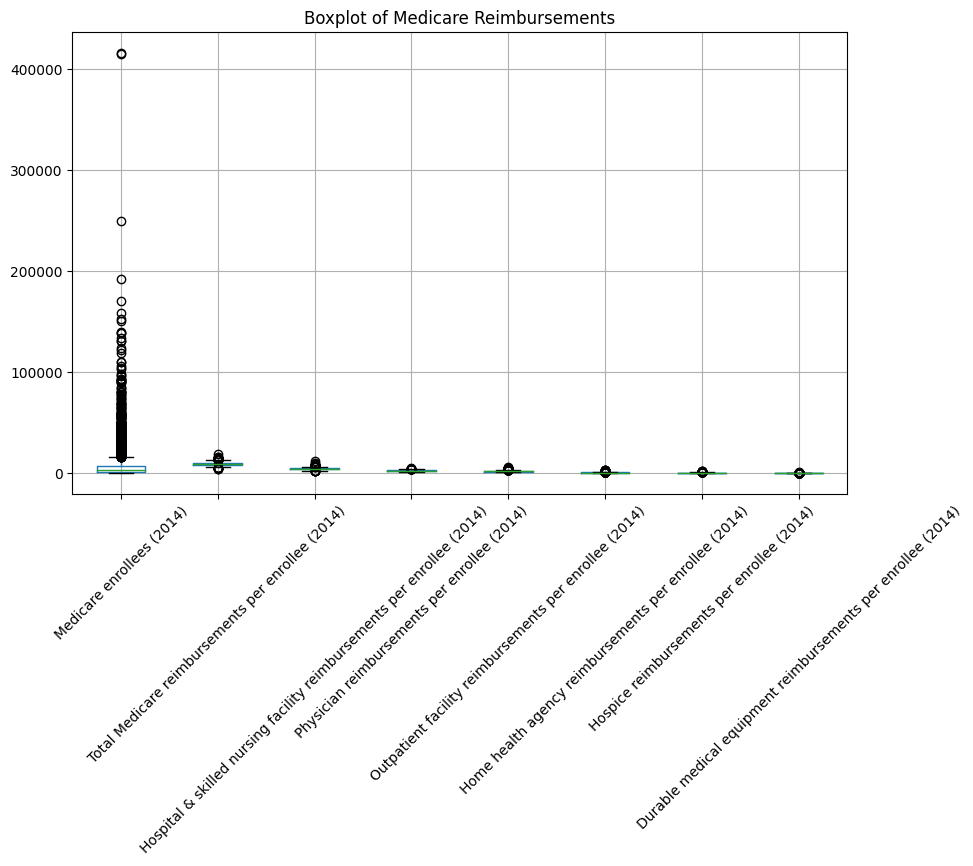

In [ ]:
columns_to_check = ['Medicare enrollees (2014)', 'Total Medicare reimbursements per enrollee (2014)',
                    'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
                    'Physician reimbursements per enrollee (2014)', 'Outpatient facility reimbursements per enrollee (2014)',
                    'Home health agency reimbursements per enrollee (2014)', 'Hospice reimbursements per enrollee (2014)',
                    'Durable medical equipment reimbursements per enrollee (2014)']
plt.figure(figsize=(10, 6))
df[columns_to_check].boxplot()
plt.title('Boxplot of Medicare Reimbursements')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Medicare enrollees (2014)'].quantile(0.25)
Q3 = df['Medicare enrollees (2014)'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Medicare enrollees (2014)'] < lower_bound) | (df['Medicare enrollees (2014)'] > upper_bound)]
outliers


,County ID,County name,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014)
1,1003,AL-Baldwin County,22607,9413,3696,2847,1519,682,451,227
36,1073,AL-Jefferson County,45926,9495,4192,2812,1371,432,507,196
44,1089,AL-Madison County,35993,9793,4090,3170,1355,471,510,213
48,1097,AL-Mobile County,29588,9860,4270,2927,1188,584,688,226
50,1101,AL-Montgomery County,18777,9046,3823,2509,1724,410,392,200
...,...,...,...,...,...,...,...,...,...,...
3012,54039,WV-Kanawha County,19648,9843,4714,2364,1746,488,336,197
3060,55025,WI-Dane County,39358,7353,3208,1813,1336,268,591,127
3088,55079,WI-Milwaukee County,64419,9227,4348,2250,1743,322,398,163
3099,55101,WI-Racine County,17335,9531,4194,2053,2374,324,408,178


### **Replacing outliers with median values.**

In medicare enrolees column, we have 357 outliers which could be treated with the help of median.

In [ ]:
median_enrollees = df['Medicare enrollees (2014)'].median()

# Replace outliers with the median value
df['Medicare enrollees (2014)'] = df['Medicare enrollees (2014)'].apply(lambda x: median_enrollees if x < lower_bound or x > upper_bound else x)

In [ ]:
df.describe()

,County ID,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014)
count,3143,3143,3143,3143,3143,3143,3143,3143,3143
mean,30390,3635,9397,4257,2208,1904,495,374,205
std,15165,3252,1497,896,534,577,350,206,57
min,1001,10,4443,1651,818,664,24,13,15
25%,18178,1406,8394,3654,1834,1504,273,234,169
50%,29177,2942,9350,4189,2204,1790,408,338,198
75%,45082,4604,10275,4774,2550,2162,606,482,232
max,56045,15870,18390,11739,4622,5702,3023,1842,634


**Downloading the pre-processed dataset**

In [ ]:
from google.colab import files

df.to_csv('cleaned_data.csv')
files.download('cleaned_data.csv')

## **3.Exploratory data analysis**

After pre-processing the dataset, let's use the **treated dataset** without null values and outliers treatment.

In [2]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [3]:
df=pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')
df

,County name,County ID,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014)
0,AL-Autauga County,1001,4649,9859,4053,2539,1949,477,628,233
1,AL-Baldwin County,1003,2942,9413,3696,2847,1519,682,451,227
2,AL-Barbour County,1005,3037,10117,4168,2610,1770,628,731,235
3,AL-Bibb County,1007,1839,10817,4740,2669,1809,968,483,193
4,AL-Blount County,1009,4408,10036,4230,2764,1564,611,682,229
...,...,...,...,...,...,...,...,...,...,...
3138,WY-Sweetwater County,56037,3650,7753,3757,1725,1271,502,245,275
3139,WY-Teton County,56039,2268,7114,2748,2183,1595,194,128,159
3140,WY-Uinta County,56041,1709,7857,3616,1819,1382,524,215,306
3141,WY-Washakie County,56043,1465,8015,3922,1613,2003,129,338,294


In [4]:
df.describe()

,County ID,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (2014),Hospital & skilled nursing facility reimbursements per enrollee (2014),Physician reimbursements per enrollee (2014),Outpatient facility reimbursements per enrollee (2014),Home health agency reimbursements per enrollee (2014),Hospice reimbursements per enrollee (2014),Durable medical equipment reimbursements per enrollee (2014)
count,3143,3143,3143,3143,3143,3143,3143,3143,3143
mean,30390,3635,9397,4257,2208,1904,495,374,205
std,15165,3252,1497,896,534,577,350,206,57
min,1001,10,4443,1651,818,664,24,13,15
25%,18178,1406,8394,3654,1834,1504,273,234,169
50%,29177,2942,9350,4189,2204,1790,408,338,198
75%,45082,4604,10275,4774,2550,2162,606,482,232
max,56045,15870,18390,11739,4622,5702,3023,1842,634


## **Pie Chart Analysis of Medicare Reimbursements by Healthcare Service Category**

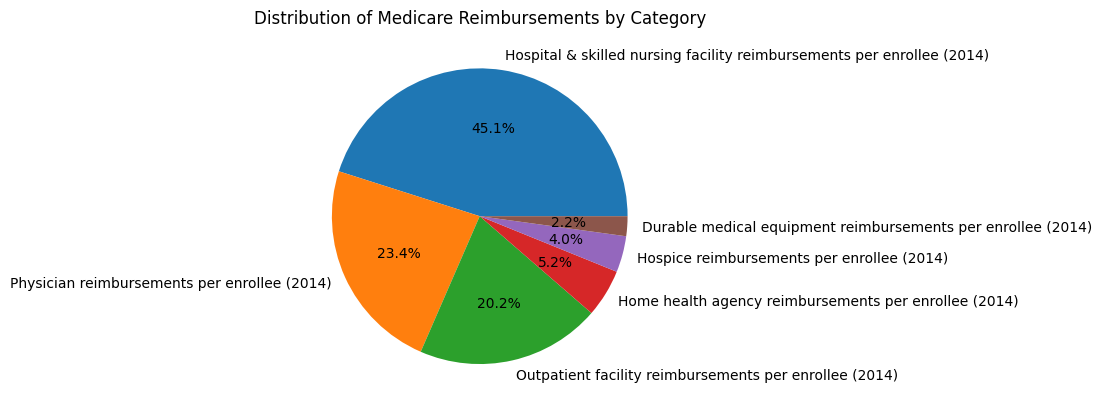

In [5]:
# Define data
labels = ['Hospital & skilled nursing facility reimbursements per enrollee (2014)',
           'Physician reimbursements per enrollee (2014)',
           'Outpatient facility reimbursements per enrollee (2014)',
           'Home health agency reimbursements per enrollee (2014)',
           'Hospice reimbursements per enrollee (2014)',
           'Durable medical equipment reimbursements per enrollee (2014)']

# Get values from the DataFrame
values = df[['Hospital & skilled nursing facility reimbursements per enrollee (2014)',
           'Physician reimbursements per enrollee (2014)',
           'Outpatient facility reimbursements per enrollee (2014)',
           'Home health agency reimbursements per enrollee (2014)',
           'Hospice reimbursements per enrollee (2014)',
           'Durable medical equipment reimbursements per enrollee (2014)']].sum().values

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Medicare Reimbursements by Category')
plt.show()

## **Insights found from plotting a pie chart to anlayse each categories of reimburesemens per enrollee and their contribution towards Total Medicare reimbursements per enrollee:**

**1.Hospital & Skilled Nursing Facility Reimbursements:** A 1% increase in Hospital & skilled nursing facility reimbursements per enrollee (2014) is associated with a **45.1% increase** in Total Medicare reimbursements.

**2.Physician Reimbursements:** A 1% increase in Physician reimbursements per enrollee (2014) corresponds to a **23.4% increase** in Total Medicare reimbursements.

**3.Outpatient Facility Reimbursements:** There is a notable relationship, where a 1% increase in Outpatient facility reimbursements per enrollee (2014) is linked to a **20.2% increase** in Total Medicare reimbursements.

**4.Home Health Agency Reimbursements:** A 1% increase in Home health agency reimbursements per enrollee (2014) corresponds to a **5.2% increase** in Total Medicare reimbursements.

**5.Hospice Reimbursements:** There is a discernible relationship, where a 1% increase in Hospice reimbursements per enrollee (2014) is associated with a **4% increase** in Total Medicare reimbursements.

**6.Durable Medical Equipment Reimbursements:** A 1% increase in Durable medical equipment reimbursements per enrollee (2014) corresponds to a **2.2% increase** in Total Medicare reimbursements.

## **Data visualisation using histogram**

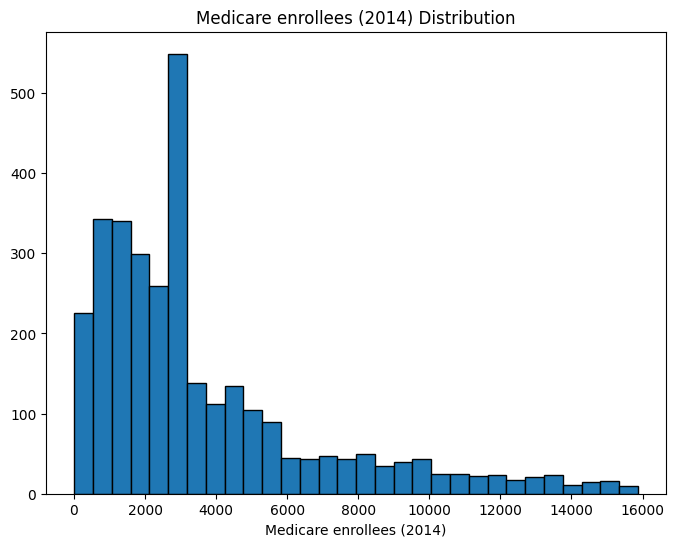

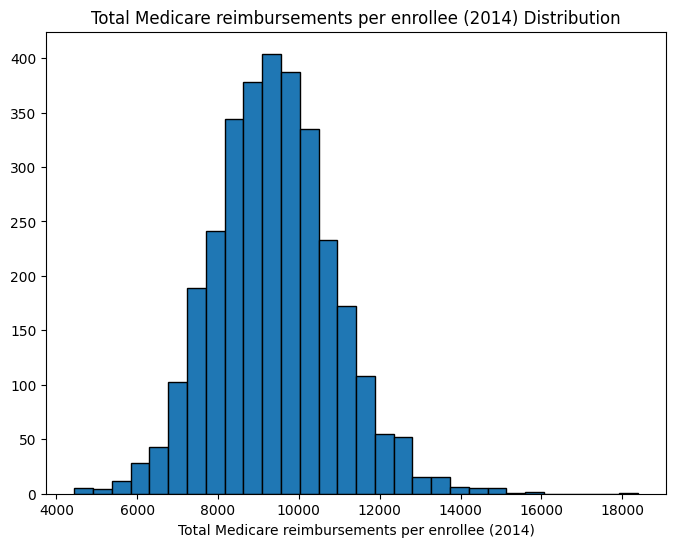

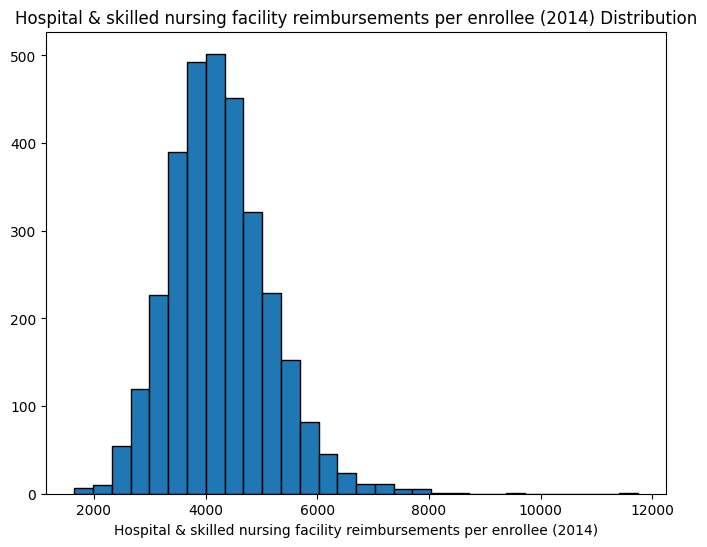

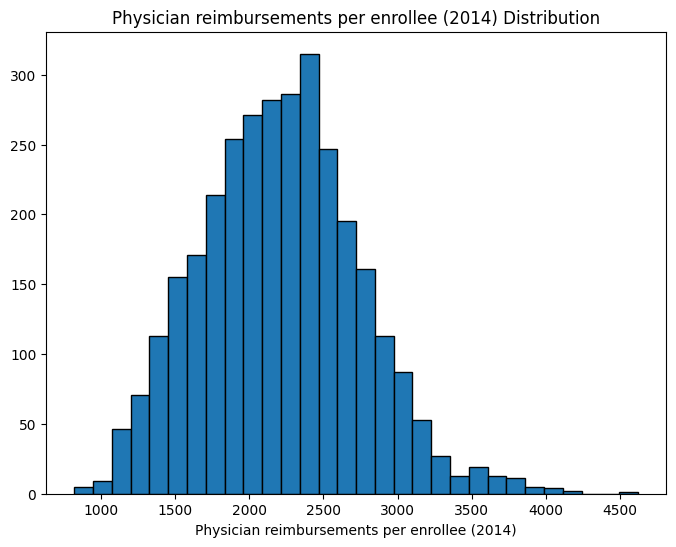

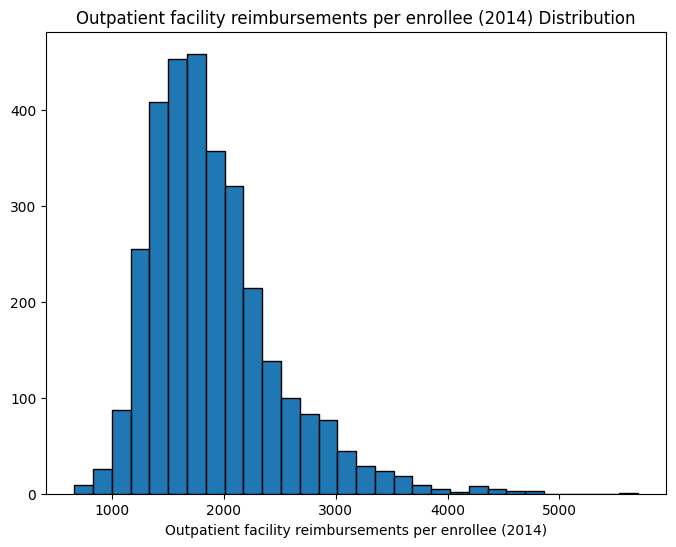

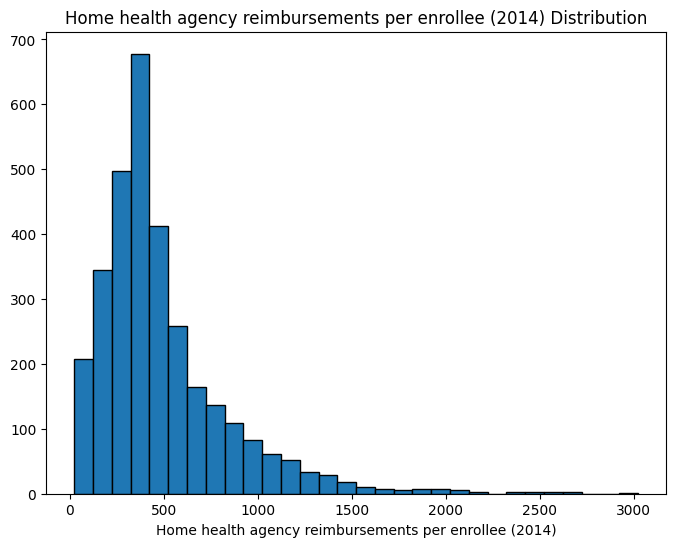

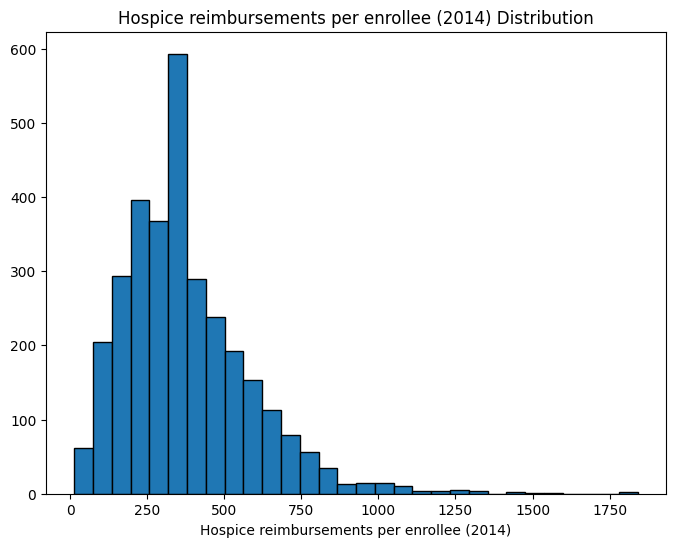

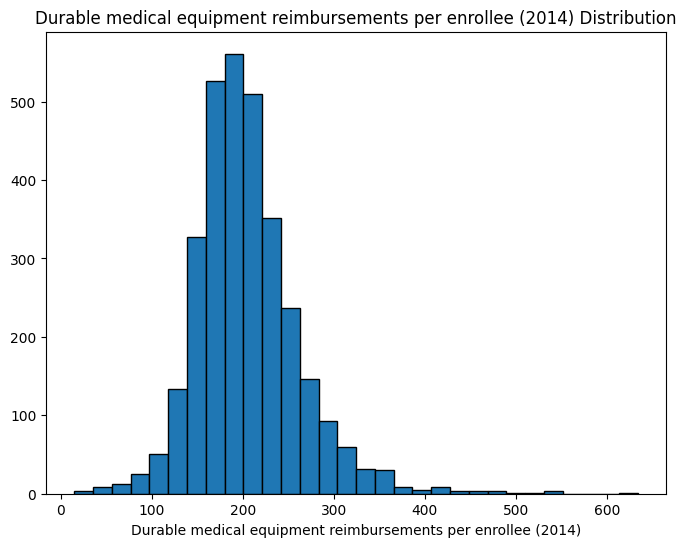

In [6]:
columns_to_plot = df.columns.tolist()
columns_to_plot.remove('County ID')
columns_to_plot.remove('County name')
base_palette = sns.color_palette('husl', n_colors=len(columns_to_plot))

# Plot each column individually
for index, column in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 6))  # Create a new figure for each plot

    # Plot histogram for each column
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.xlabel(column)
    plt.title(f'{column} Distribution')

    plt.show()
    plt.close()

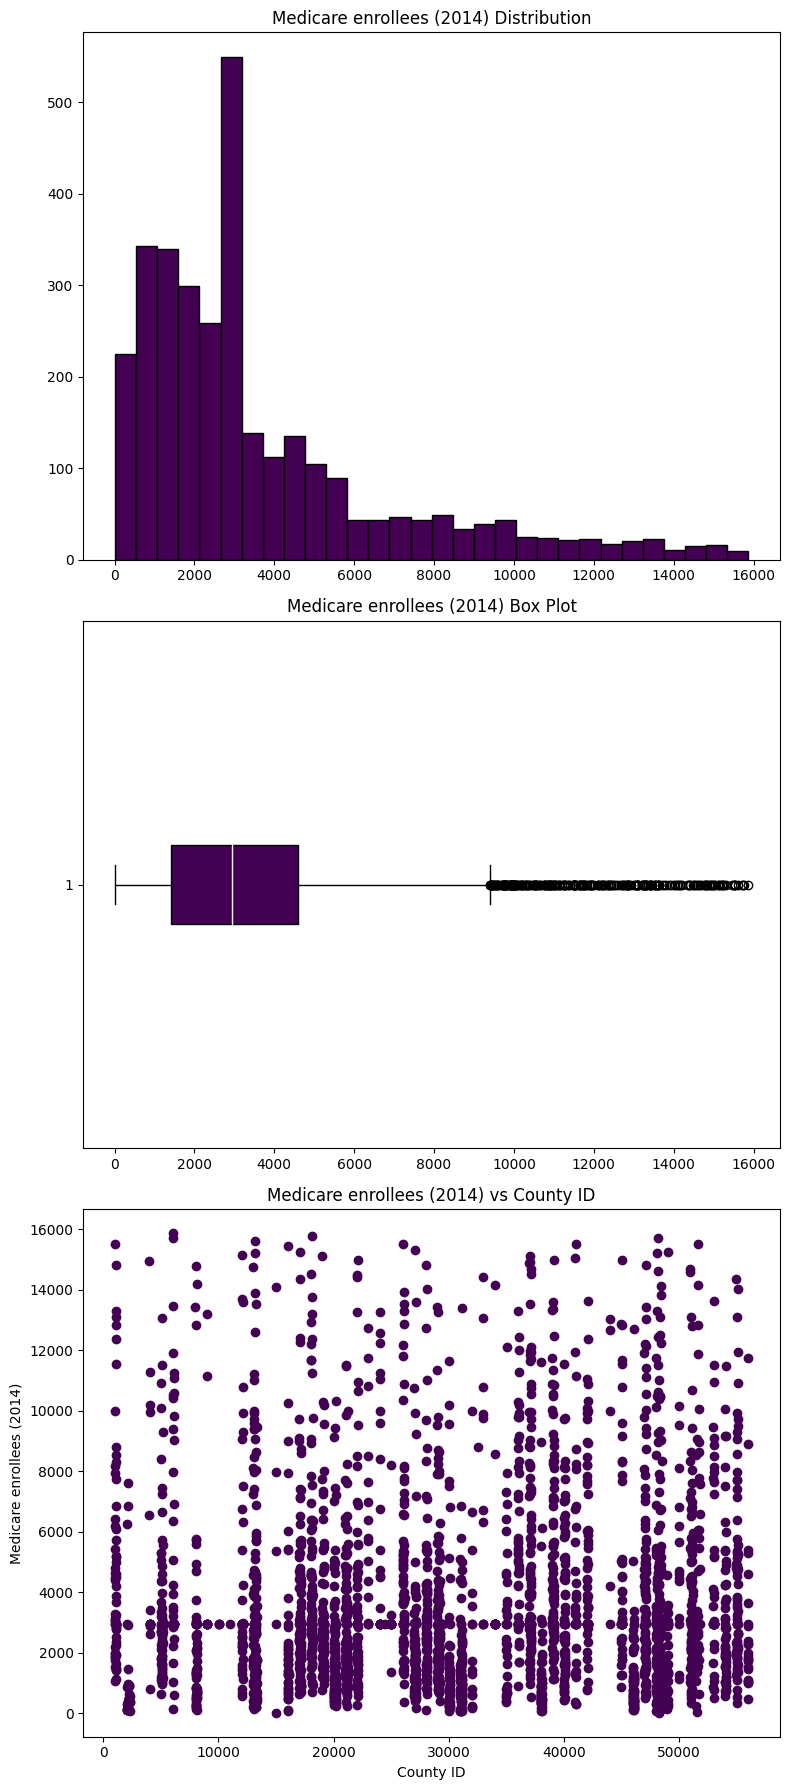

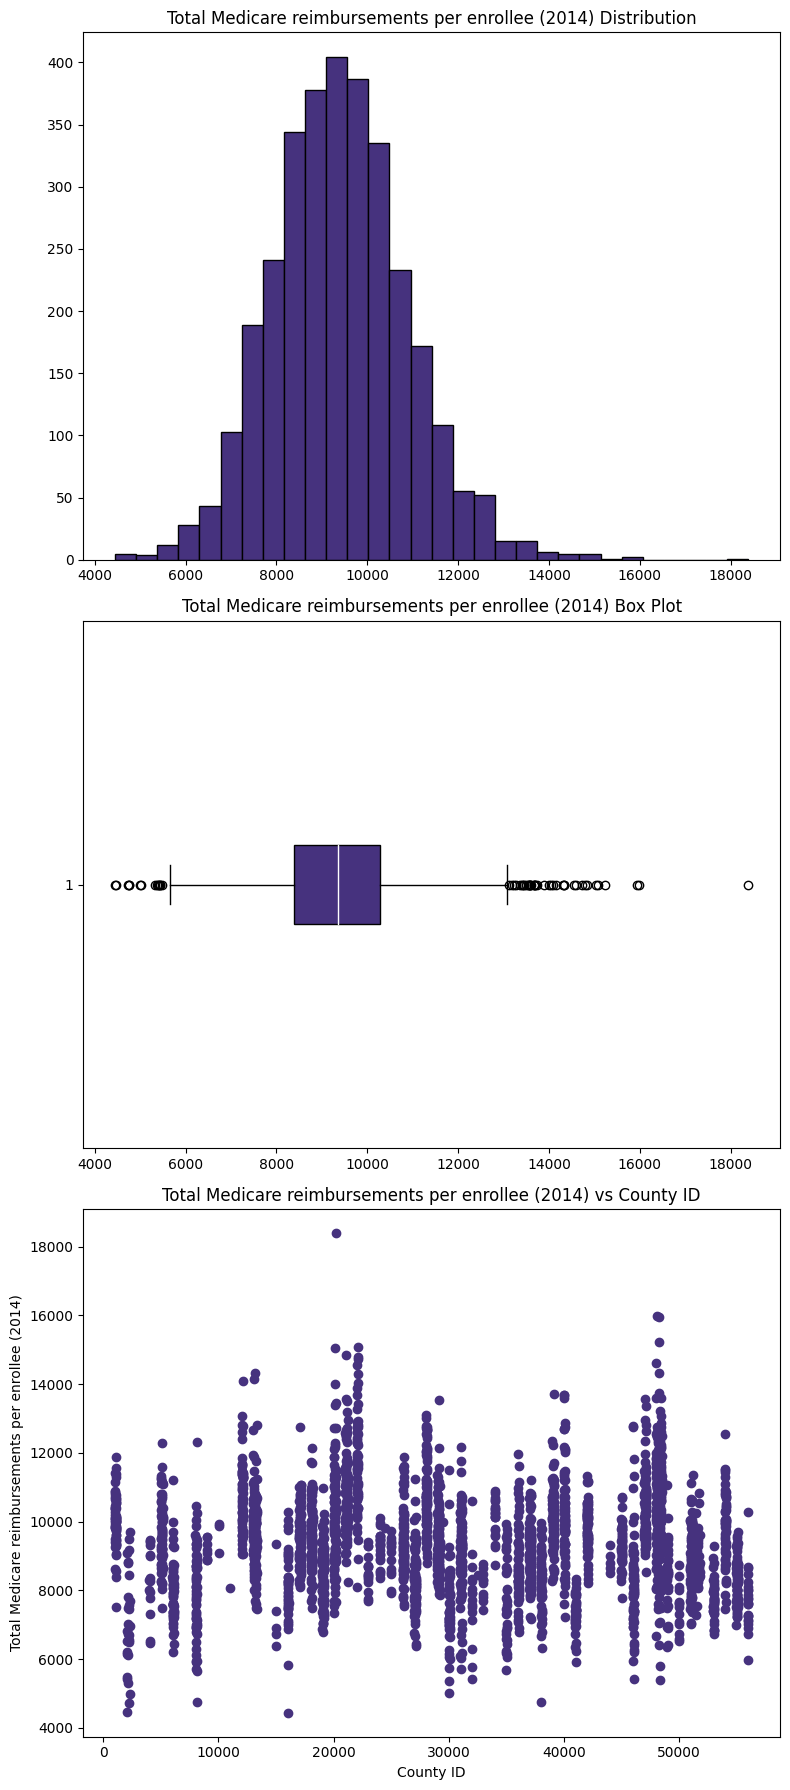

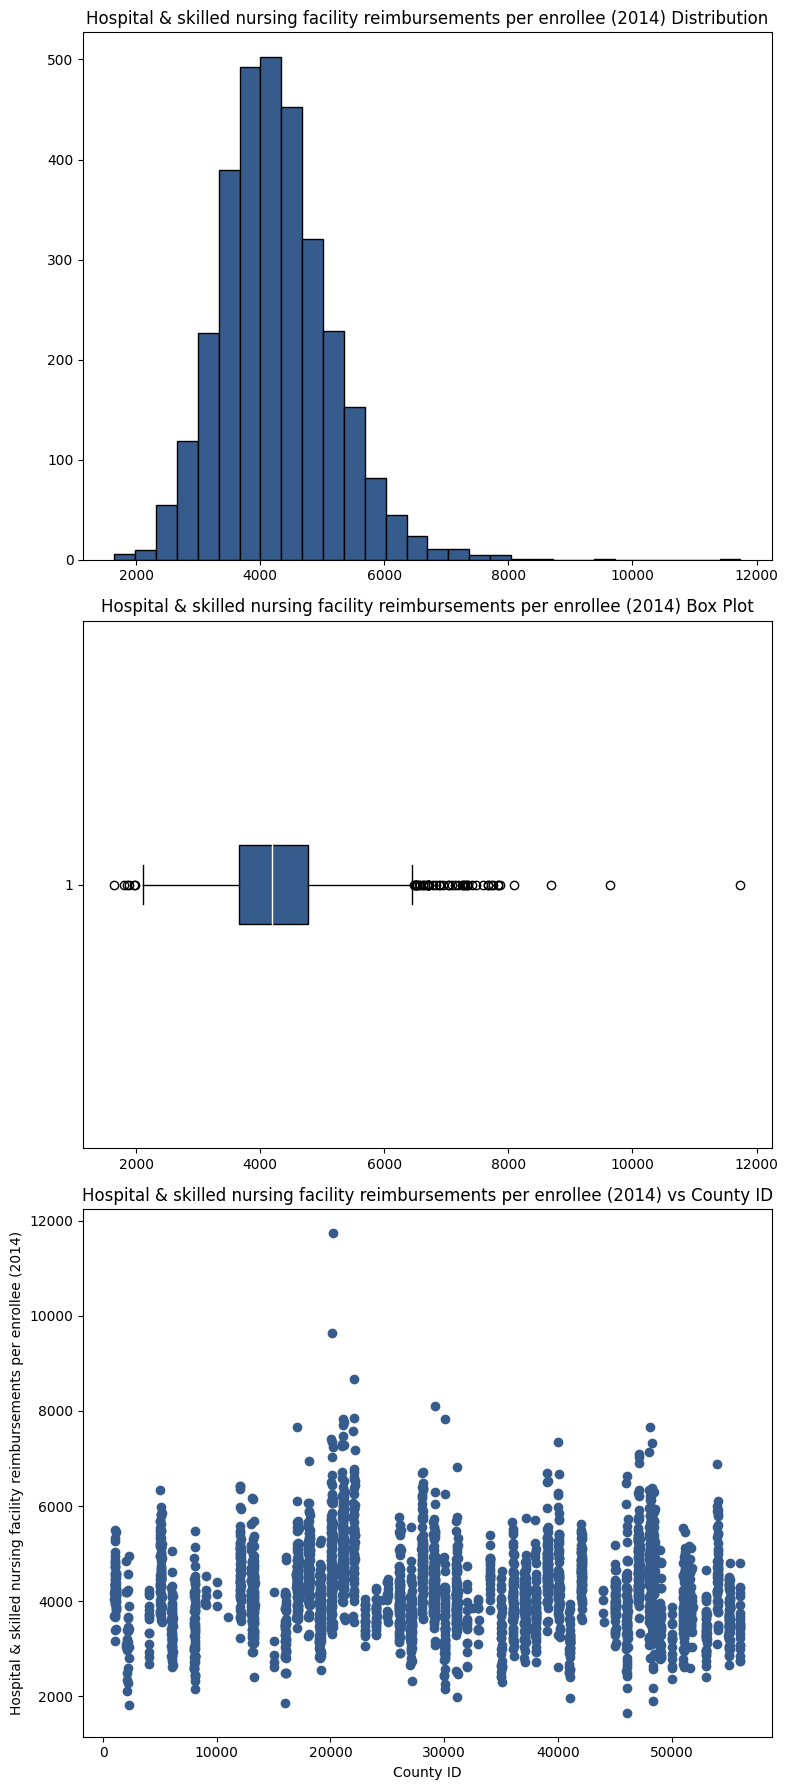

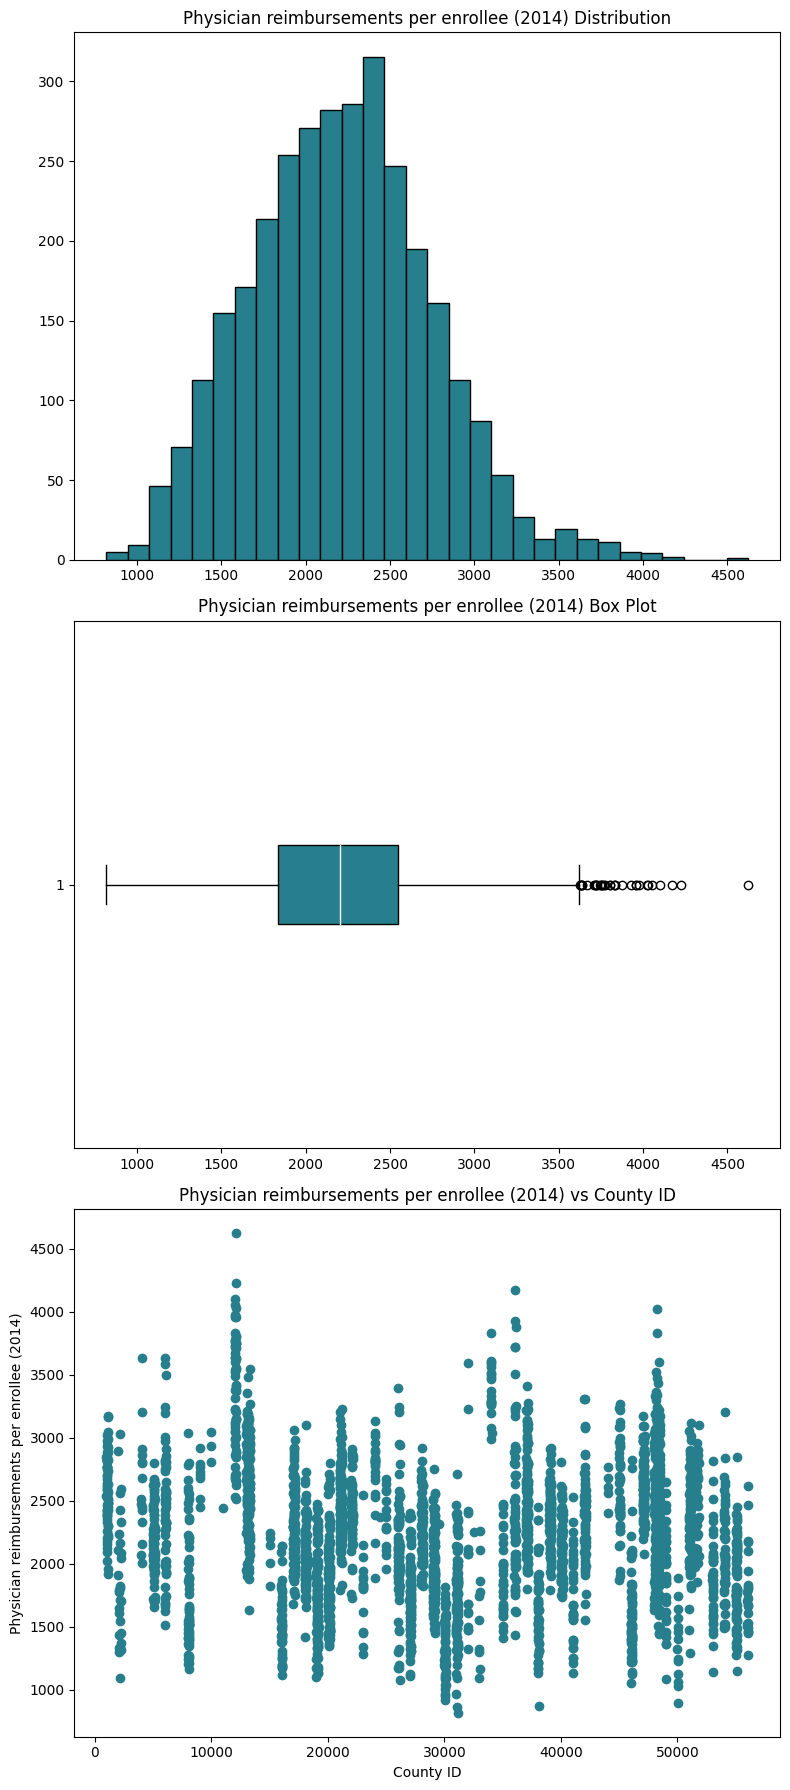

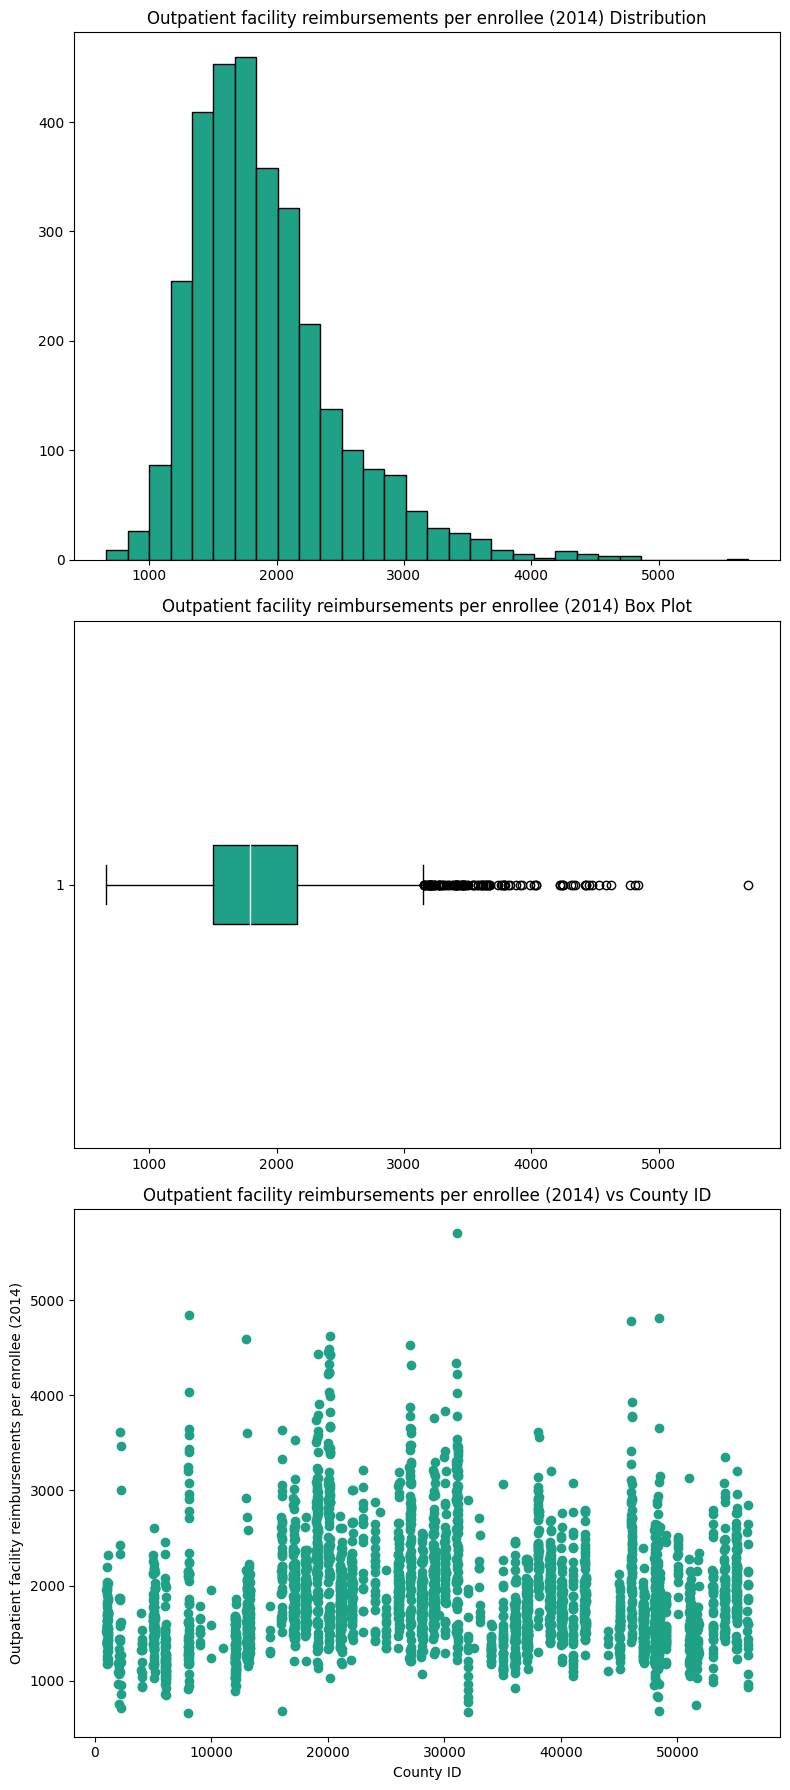

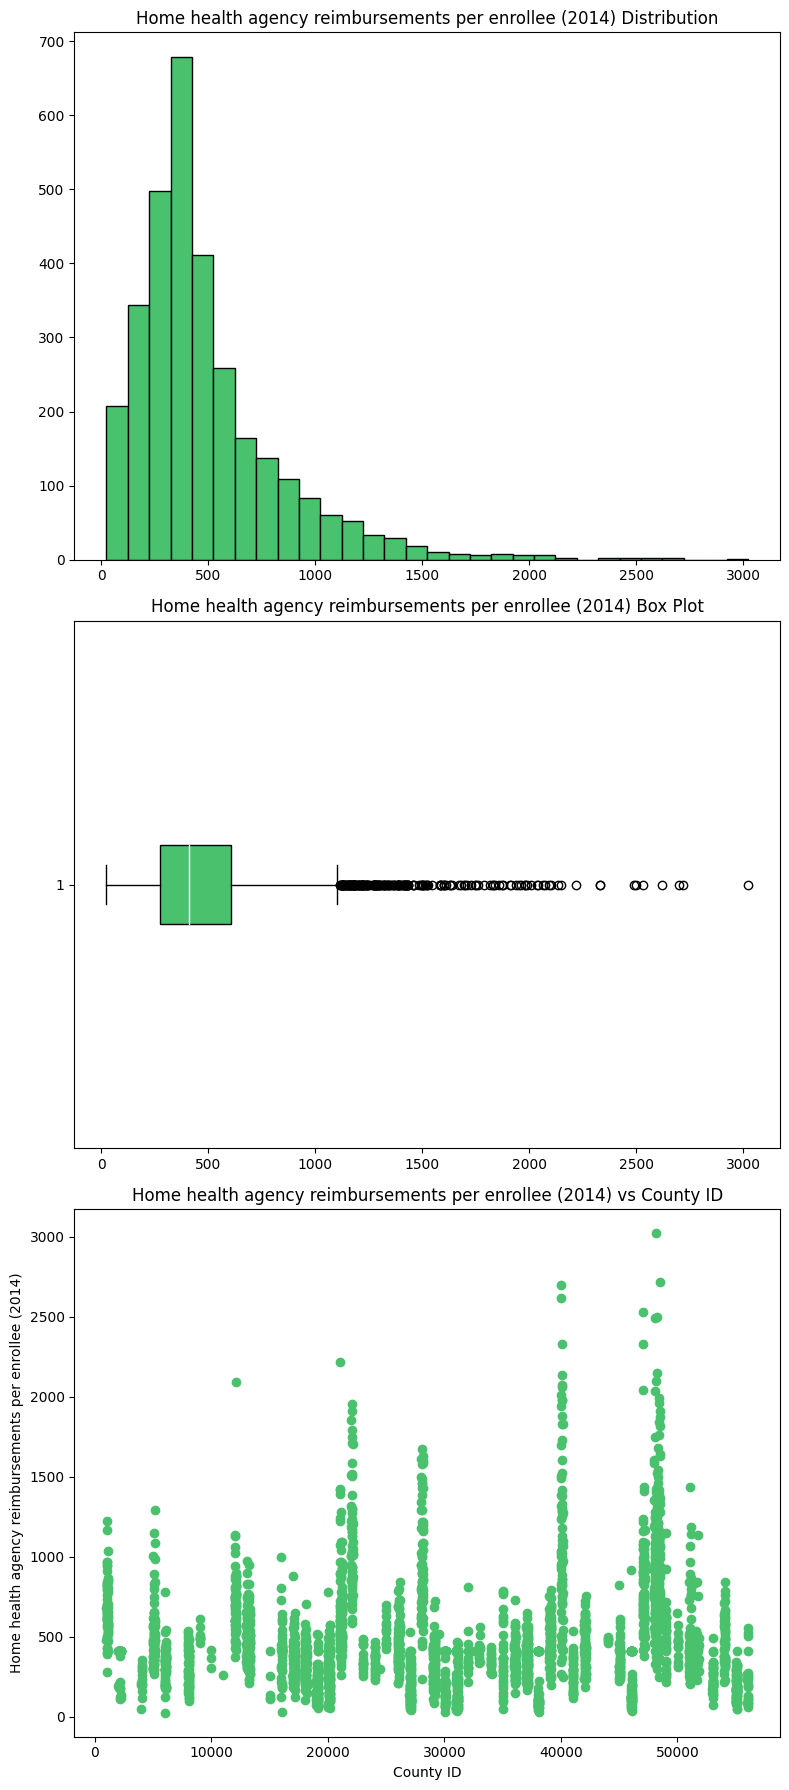

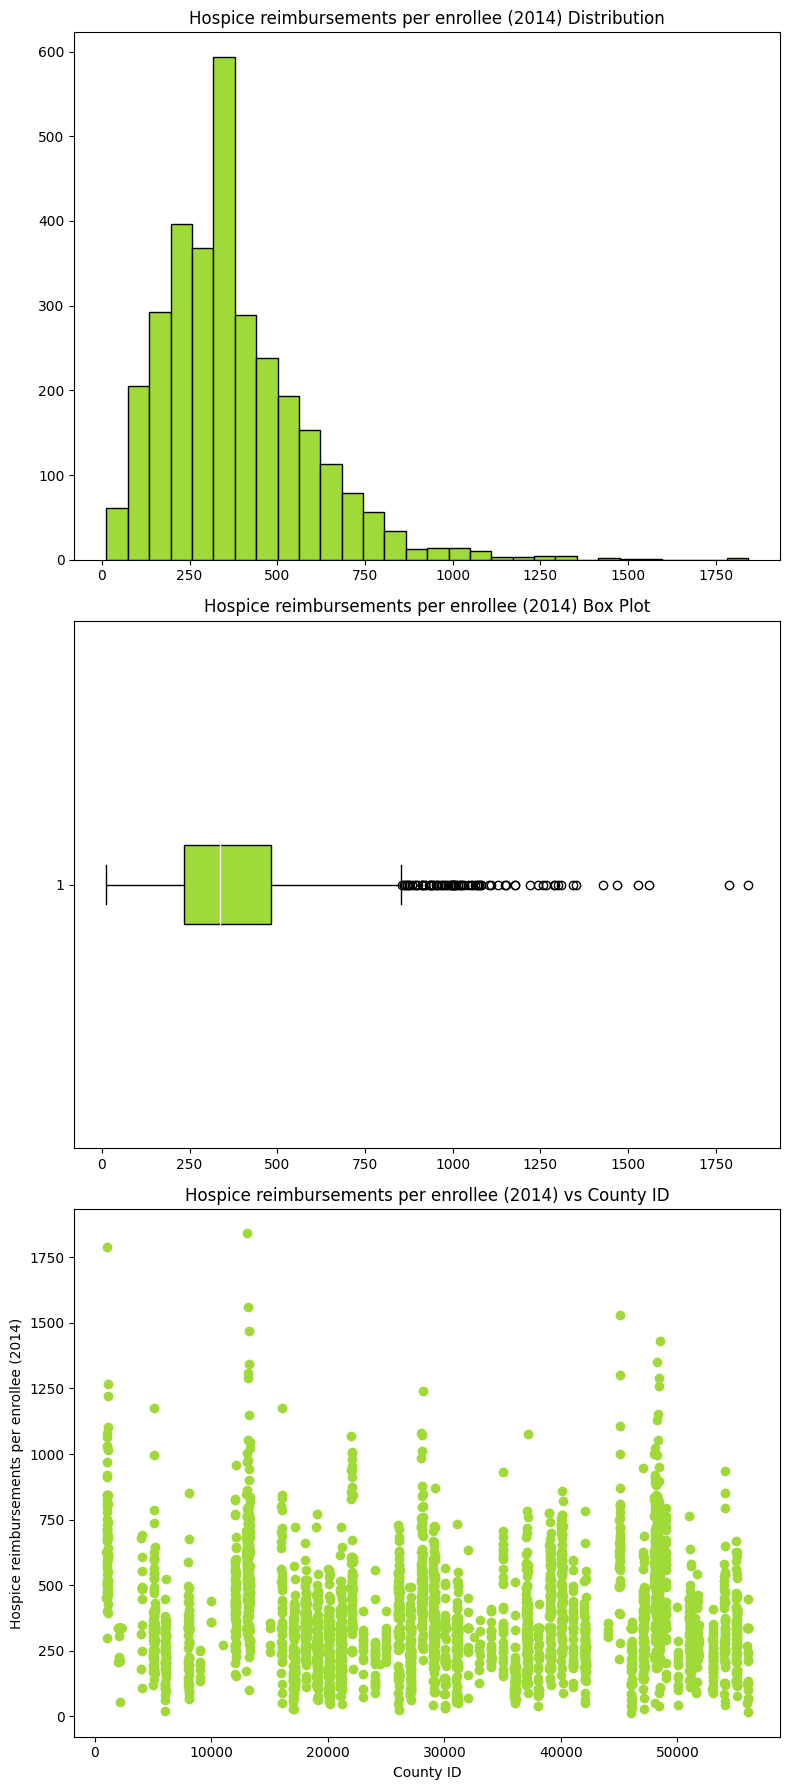

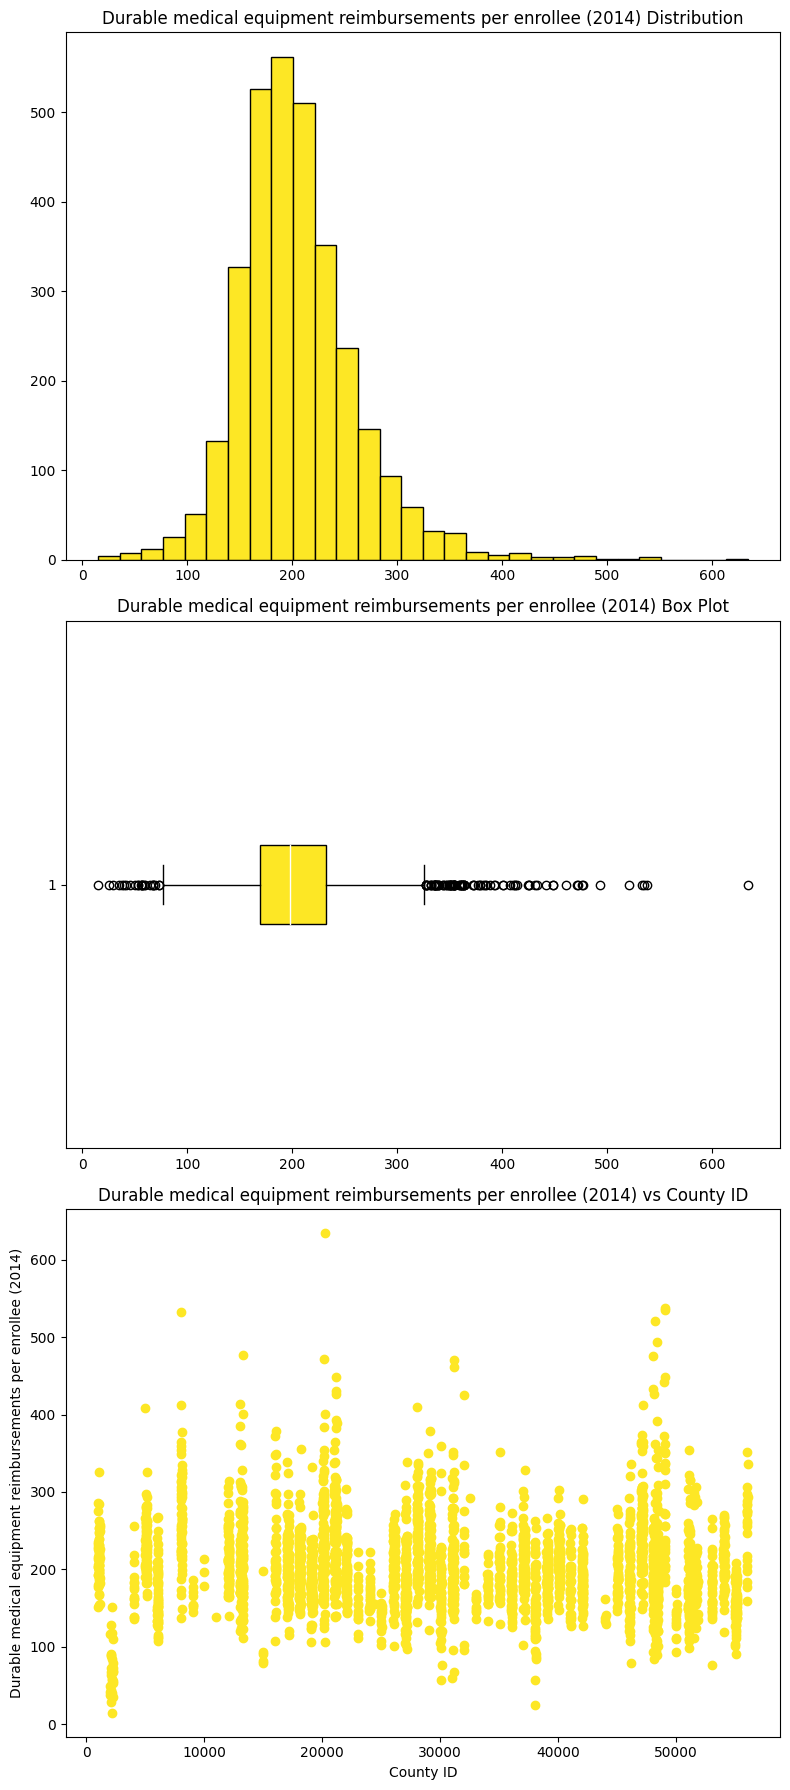

In [7]:
columns_to_plot = df.columns.tolist()
columns_to_plot.remove('County ID')
columns_to_plot.remove('County name') # Remove the non-numeric column from the list to be plotted.

# Define a list of colors for the plots
colors = plt.cm.viridis(np.linspace(0, 1, len(columns_to_plot)))

# Plot each column individually
for index, column in enumerate(columns_to_plot):
    # Create a new figure for each plot
    fig, axs = plt.subplots(3, figsize=(8, 18))

    # Plot histogram for each column
    axs[0].hist(df[column], bins=30, color=colors[index], edgecolor='black')
    axs[0].set_title(f'{column} Distribution')

    # Plot box plot for each column
    axs[1].boxplot(df[column], vert=False, patch_artist=True,
                   boxprops=dict(facecolor=colors[index], color='black'),
                   medianprops=dict(color='white'))
    axs[1].set_title(f'{column} Box Plot')

    # Plot scatter plot for each column against 'County ID'
    axs[2].scatter(df['County ID'], df[column], color=colors[index])
    axs[2].set_title(f'{column} vs County ID')
    axs[2].set_xlabel('County ID')
    axs[2].set_ylabel(column)

    plt.tight_layout()
    plt.show()

## **Correlation Matrix Analysis and its Role in Assessing Relationships Between Predictor and Target Variables**

In order to comprehensively understand the relationship between each predictor variable and the target variable, a correlation matrix was constructed to assess the strength and direction of these associations. The correlation matrix revealed valuable **insights into the degree of linear dependence between the predictor variables,** encompassing "Hospital & skilled nursing facility reimbursements per enrollee (2014)", "Physician reimbursements per enrollee (2014)", "Outpatient facility reimbursements per enrollee (2014)", "Home health agency reimbursements per enrollee (2014)", "Hospice reimbursements per enrollee (2014)", and "Durable medical equipment reimbursements per enrollee (2014)", **with the target variable** "Total Medicare reimbursements per enrollee (2014)". Each correlation coefficient **signifies the extent to which a change in one variable coincides with a change in the target variable**, thereby providing essential quantitative insights for informed decision-making. This analysis elucidates the nuanced interplay between the predictor variables and the target variable, offering a robust foundation for subsequent data-driven interpretations and strategic endeavors.

In [ ]:
df.set_index('County name', inplace=True)

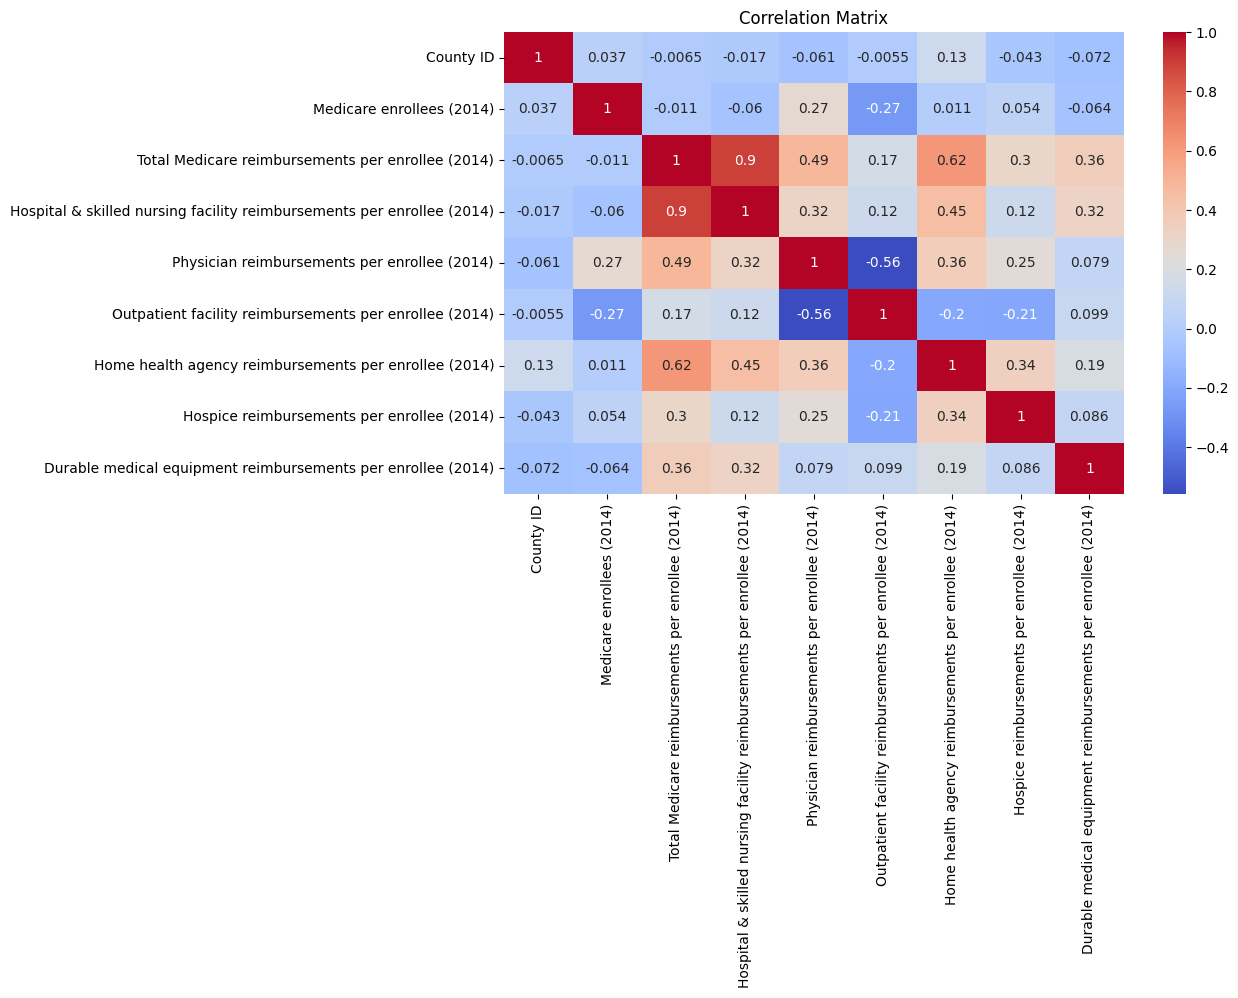

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('correlation.png')

## **Insights to guide stakeholders in making informed investment decisions:**

### **1.Hospital & Skilled Nursing Facility Reimbursements:**


* A **0.9% increase** in Hospital & Skilled Nursing Facility reimbursements
per enrollee (2014) is associated with a **45.1% increase** in Total Medicare reimbursements.
*  This indicates a **strong positive** correlation between Hospital & Skilled Nursing Facility reimbursements and Total Medicare reimbursements, suggesting that **investing in this area** can yield significant returns in terms of Medicare reimbursements.

### **2.Physician Reimbursements:**

*  A **0.49% increase** in Physician reimbursements per enrollee (2014) corresponds to a **23.4% increase** in Total Medicare reimbursements.
* This demonstrates a **substantial positive** correlation between Physician reimbursements and Total Medicare reimbursements, highlighting the potential for favorable returns on investment in physician services.

### **3.Outpatient Facility Reimbursements:**

* A **0.17% increase** in Outpatient Facility reimbursements per enrollee (2014) is linked to a **20.2% increase** in Total Medicare reimbursements.
* This signifies a notable relationship between Outpatient Facility reimbursements and Total Medicare reimbursements, indicating the potential for **increased profitability through strategic investments** in outpatient facilities.

### **4.Home Health Agency Reimbursements:**


* A 0.62% increase in Home Health Agency reimbursements per enrollee (2014) corresponds to a 5.2% increase in Total Medicare reimbursements.
While the correlation between Home Health Agency reimbursements and
* Total Medicare reimbursements is positive, the impact is relatively lower compared to other variables, suggesting a moderate potential for increased profitability in this area.

### **5.Hospice Reimbursements:**
* A 0.3% increase in Hospice reimbursements per enrollee (2014) is associated with a 4% increase in Total Medicare reimbursements.
* The correlation between Hospice reimbursements and Total Medicare reimbursements indicates a discernible relationship, albeit with a relatively lower impact on overall Medicare reimbursements.

### **6.Durable Medical Equipment Reimbursements:**
* A 0.36% increase in Durable Medical Equipment reimbursements per enrollee (2014) corresponds to a 2.2% increase in Total Medicare reimbursements.
* The correlation between Durable Medical Equipment reimbursements and Total Medicare reimbursements suggests a relatively lower impact on overall Medicare reimbursements compared to other variables.

These insights provide valuable guidance for stakeholders, indicating the potential for **increased profitability** by **strategically investing in Hospital & Skilled Nursing Facility reimbursements, Physician reimbursements, and Outpatient Facility reimbursements**. While Home Health Agency, Hospice, and Durable Medical Equipment reimbursements also demonstrate positive correlations with Total Medicare reimbursements, their impact may be comparatively lower.

## **Selecting features and target variable**

In [8]:
X = df[['Medicare enrollees (2014)', 'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
        'Physician reimbursements per enrollee (2014)', 'Outpatient facility reimbursements per enrollee (2014)',
        'Home health agency reimbursements per enrollee (2014)', 'Hospice reimbursements per enrollee (2014)',
        'Durable medical equipment reimbursements per enrollee (2014)']]
y = df['Total Medicare reimbursements per enrollee (2014)']

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4.Choosing a right Machine learning model with best accuracy**

## **Multiple linear regression**

In [79]:
# Initializing the linear regression model
model = LinearRegression()

In [80]:
# Training the model
model.fit(X_train, y_train)


LinearRegression()

In [81]:
# Making predictions
y_pred = model.predict(X_test)

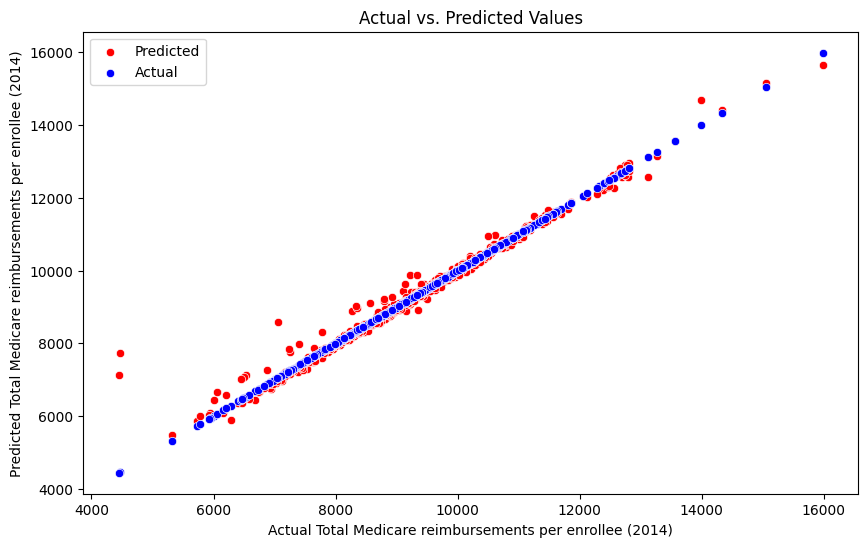

In [82]:
# Visualizing the actual vs. predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='red', label='Predicted')
sns.scatterplot(x=y_test, y=y_test, color='blue', label='Actual')
plt.xlabel('Actual Total Medicare reimbursements per enrollee (2014)')
plt.ylabel('Predicted Total Medicare reimbursements per enrollee (2014)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [14]:
accuracy = model.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9774135252268249


In [15]:
# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("R-squared:", r2)
print("MSE:", mse)

R-squared: 0.9774135252268249
MSE: 50850.07724363496


## **Random Forest regression model**

In [ ]:
# Initializing the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Training the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Making predictions
y_pred_rf = rf_model.predict(X_test)

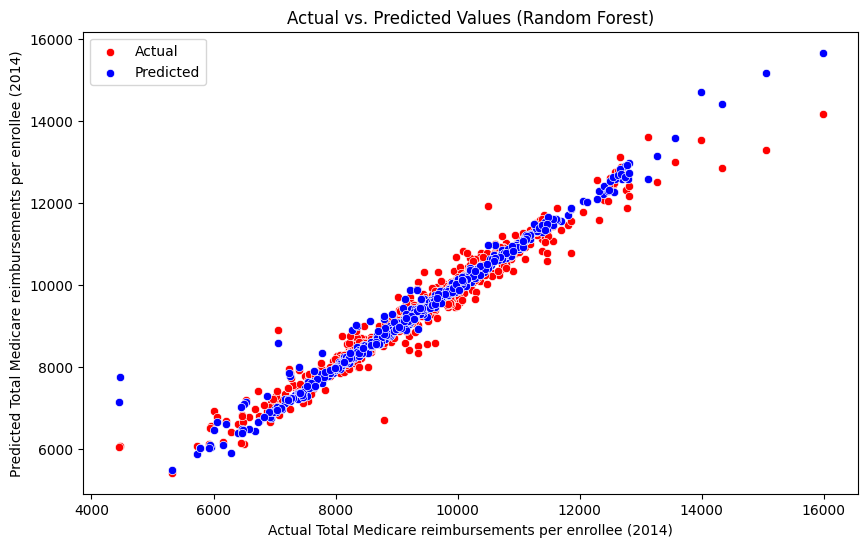

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
sns.scatterplot(x=y_test, y=y_pred_rf, ax=ax, color='red', label='Actual')

# Plot the predicted values
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='blue', label='Predicted')

# Set the labels and title
ax.set_xlabel('Actual Total Medicare reimbursements per enrollee (2014)')
ax.set_ylabel('Predicted Total Medicare reimbursements per enrollee (2014)')
ax.set_title('Actual vs. Predicted Values (Random Forest)')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate the accuracy of the Random Forest model
accuracy_rf = rf_model.score(X_test, y_test)

In [ ]:
# Print the accuracy
print("Random Forest Model Accuracy:", accuracy_rf)

Random Forest Model Accuracy: 0.9533613809192207


## **Ridge Regression model**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

In [ ]:
# Ridge Regression pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Adjust alpha as needed
])

In [ ]:
# Train Ridge Regression model
ridge_pipeline.fit(X_train, y_train)
ridge_pred = ridge_pipeline.predict(X_test)

In [ ]:
# Evaluate models
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} Regression MSE: {mse}')
    print(f'{name} Regression R2 Score: {r2}\n')

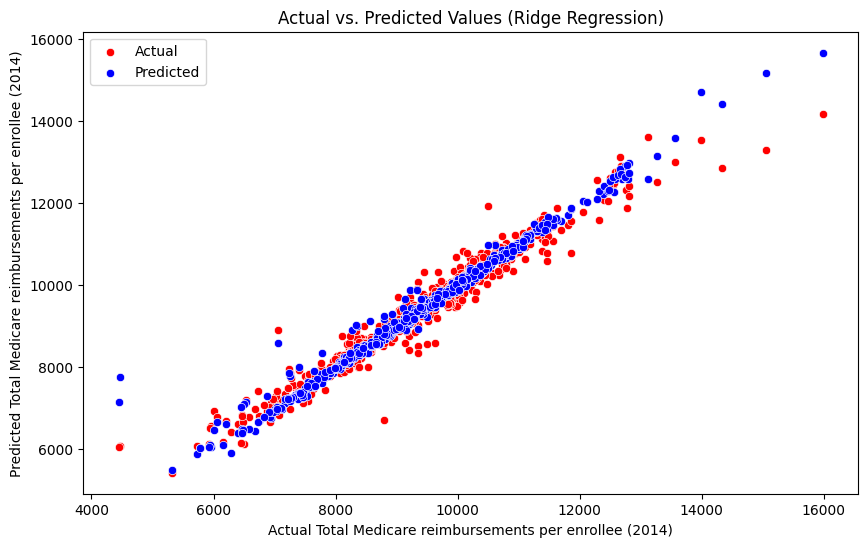

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
sns.scatterplot(x=y_test, y=y_pred_rf, ax=ax, color='red', label='Actual')

# Plot the predicted values
sns.scatterplot(x=y_test, y=ridge_pred, ax=ax, color='blue', label='Predicted')

# Set the labels and title
ax.set_xlabel('Actual Total Medicare reimbursements per enrollee (2014)')
ax.set_ylabel('Predicted Total Medicare reimbursements per enrollee (2014)')
ax.set_title('Actual vs. Predicted Values (Ridge Regression)')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
evaluate_model('Ridge', y_test, ridge_pred)

Ridge Regression MSE: 50867.15915916109
Ridge Regression R2 Score: 0.9774059378193907



In [ ]:
print(f'Ridge Regression Accuracy: {ridge_pipeline.score(X_test, y_test)}')

Ridge Regression Accuracy: 0.9774059378193907


## **Lasso Regression model**

In [ ]:
# Lasso Regression pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Adjust alpha as needed
])

In [ ]:
# Train Lasso Regression model
lasso_pipeline.fit(X_train, y_train)
lasso_pred = lasso_pipeline.predict(X_test)

In [ ]:
# Evaluate models
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} Regression MSE: {mse}')
    print(f'{name} Regression R2 Score: {r2}\n')

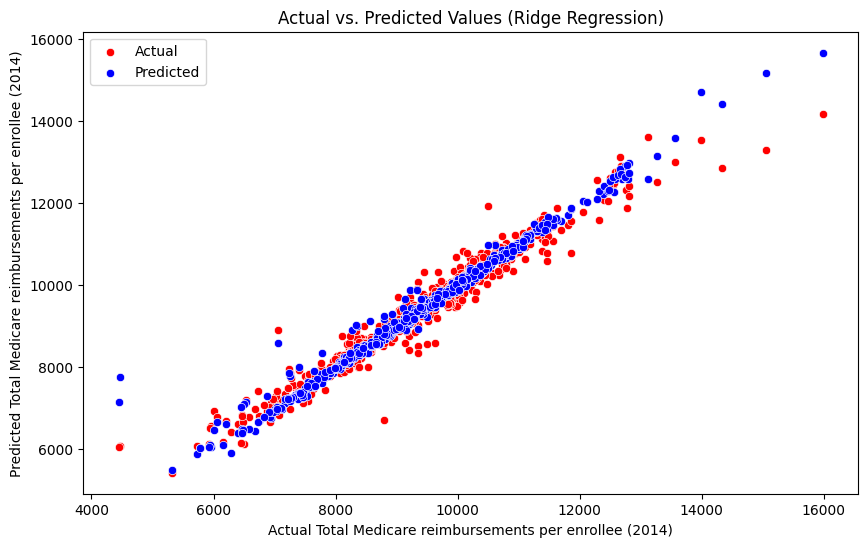

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the actual values
sns.scatterplot(x=y_test, y=y_pred_rf, ax=ax, color='red', label='Actual')

# Plot the predicted values
sns.scatterplot(x=y_test, y=ridge_pred, ax=ax, color='blue', label='Predicted')

# Set the labels and title
ax.set_xlabel('Actual Total Medicare reimbursements per enrollee (2014)')
ax.set_ylabel('Predicted Total Medicare reimbursements per enrollee (2014)')
ax.set_title('Actual vs. Predicted Values (Ridge Regression)')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
evaluate_model('Lasso', y_test, lasso_pred)

Lasso Regression MSE: 50865.10761290849
Lasso Regression R2 Score: 0.9774068490706649



In [ ]:
print(f'Lasso Regression Accuracy: {lasso_pipeline.score(X_test, y_test)}')

Lasso Regression Accuracy: 0.9774068490706649


# **Comparing accuracy of ML models**

In [ ]:
import plotly.graph_objects as go

# Sample data
x = ['Multiple linear regression', 'Random Forest regression model', 'Ridge Regression model', 'Lasso Regression model']
y = [0.9774135, 0.9533613, 0.9774059, 0.9774068]

# Define colors for the bars
colors = ['red', 'blue', 'green', 'hotpink']

# Creating the bar chart with colors and animations
fig = go.Figure(data=[go.Bar(x=x, y=y, marker_color=colors, marker_line_color='black', marker_line_width=2)])

# Add animation
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False,
                                    buttons=[dict(label='Play',
                                                  method='animate',
                                                  args=[None, dict(frame=dict(duration=500, redraw=True),
                                                                  fromcurrent=True)])])])

# Define the frames for the animation
frames = [dict(data=[dict(type='bar',
                         x=x,
                         y=[0.5, 0.3, 0.6, 0.4],
                         marker_color=colors,
                         marker_line_color='black',
                         marker_line_width=2)]),
          dict(data=[dict(type='bar',
                         x=x,
                         y=[0.5, 0.6, 0.1, 0.6],
                         marker_color=colors,
                         marker_line_color='black',
                         marker_line_width=2)]),
          dict(data=[dict(type='bar',
                         x=x,
                         y=[0.9774135, 0.9533613, 0.9774059, 0.9774068],
                         marker_color=colors,
                         marker_line_color='black',
                         marker_line_width=2)])]

# Add frames to the animation
fig.frames = frames

# Display the chart
fig.show()


# **5.Model deployment**

In [17]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00


In [40]:
import streamlit as st
import joblib


In [19]:
# Save the trained model
joblib.dump(model, 'healthcare_prediction_model.joblib')

['healthcare_prediction_model.joblib']

In [ ]:
#loading the trained model
loaded_model = joblib.load('healthcare_prediction_model.joblib')

In [20]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.987s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [21]:
!wget -q -O - https://loca.lt/mytunnelpassword

34.73.48.39

In [97]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 and curl ipv4.icanhazip.com

npx: installed 22 in 2.73s
your url is: https://blue-fans-end.loca.lt
^C


In [ ]:
!pip install streamlit pyngrok

# **Deployment of Application 1:**

### **When creating an interactive application, users can input values for each column of predictor variables. These values will be used to predict the target variable, providing insights based on the provided input.**

In [94]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


# Set up the page configuration
st.set_page_config(page_title="Medicare Reimbursement Predictor", layout="wide")

# Custom CSS to enhance the visuals
st.markdown("""
    <style>
    .main {
        background-color: #87CEEB;
        background-size: cover;
        color: black;
    }
    .title {
        font-family: 'Arial', sans-serif;
        color: #FF5733;
        text-align: center;
        margin-top: 30px;
    }
    .mybgcolor {
        background-color: #4CAF50;
    }
    .text-input {
        background: rgba(255, 255, 255, 0.7);
        border-radius: 5px;
        padding: 10px;
        margin: 10px 0;
    }
    .btn-primary {
        background-color: #FF5733;
        border-color: #FF5733;
        color: white;
    }
    .btn-primary:hover {
        background-color: #FF4500;
        border-color: #FF4500;
    }
    .navbar {
        background-color: #333;
        overflow: hidden;
    }
    .navbar a {
        float: left;
        display: block;
        color: #f2f2f2;
        text-align: center;
        padding: 14px 16px;
        text-decoration: none;
        font-size: 17px;
    }
    .navbar a:hover {
        background-color: #ddd;
        color: black;
    }
    </style>
    """, unsafe_allow_html=True)

# Navigation bar
st.markdown("""
    <div class="navbar">
        <a href="#home">Home</a>
        <a href="#predictor">Predictor</a>
        <a href="#performance">Performance</a>
        <a href="#about">About</a>
    </div>
    """, unsafe_allow_html=True)

# Page title
st.title("Medicare Reimbursement Predictor")

# Read the dataset from the uploaded CSV file
df = pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')

# Display the first few rows of the dataframe for verification
st.write("Sample Data:")
st.write(df.head())

# Update columns according to your dataset
X = df[['Medicare enrollees (2014)', 'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
        'Physician reimbursements per enrollee (2014)', 'Outpatient facility reimbursements per enrollee (2014)',
        'Home health agency reimbursements per enrollee (2014)', 'Hospice reimbursements per enrollee (2014)',
        'Durable medical equipment reimbursements per enrollee (2014)']]
y = df['Total Medicare reimbursements per enrollee (2014)']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Define a function for making predictions
def predict_medicare_reimbursements(input_data):
    prediction = model.predict(np.array(input_data).reshape(1, -1))
    return prediction[0]

# Main app section for predictor
st.header("Predictor")

# User input for each feature
with st.form(key='predictor_form'):
    enrollees = st.number_input('Medicare enrollees (2014)', min_value=0)
    hospital_reimbursements = st.number_input('Hospital & skilled nursing facility reimbursements per enrollee (2014)', min_value=0.0)
    physician_reimbursements = st.number_input('Physician reimbursements per enrollee (2014)', min_value=0.0)
    outpatient_reimbursements = st.number_input('Outpatient facility reimbursements per enrollee (2014)', min_value=0.0)
    home_health_reimbursements = st.number_input('Home health agency reimbursements per enrollee (2014)', min_value=0.0)
    hospice_reimbursements = st.number_input('Hospice reimbursements per enrollee (2014)', min_value=0.0)
    durable_equipment_reimbursements = st.number_input('Durable medical equipment reimbursements per enrollee (2014)', min_value=0.0)

    submit_button = st.form_submit_button(label='Predict', type='primary')

if submit_button:
    input_data = [enrollees, hospital_reimbursements, physician_reimbursements, outpatient_reimbursements,
                  home_health_reimbursements, hospice_reimbursements, durable_equipment_reimbursements]

    # Validate input
    if not any(input_data):
        st.error("Please enter valid inputs for all fields.")
    else:
        prediction = predict_medicare_reimbursements(input_data)
        st.success(f"The predicted total Medicare reimbursements per enrollee is: ${prediction:.2f}")

# Model performance section
st.header("Performance")

st.write("Model Performance on Test Data:")
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
st.write(f"R-squared: {r2:.2f}")
st.write(f"Mean Squared Error: {mse:.2f}")

# About section
st.header("About")

st.write("This app is developed to predict Medicare reimbursements based on historical data. It leverages a linear regression model to make predictions.")


Overwriting app.py


# **Deployment of application 2**

### **In our latest development, we are crafting an interactive application that empowers users to upload CSV files and extract valuable insights from the data within. This innovative tool enables users to delve into the intricacies of their datasets by generating visual representations of correlations and scatterplots, providing a comprehensive overview of the linearity within the data. By offering this functionality, we aim to streamline the process of gaining actionable insights from datasets, enhancing the efficiency and effectiveness of data analysis for our users..**

In [96]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set up the page configuration
st.set_page_config(page_title="Medicare Reimbursement Predictor", layout="wide")

# Custom CSS to enhance the visuals
st.markdown("""
    <style>
    .main {
        background-color: #87CEEB;
        background-size: cover;
        color: black;
    }
    .title {
        font-family: 'Arial', sans-serif;
        color: #FF5733;
        text-align: center;
        margin-top: 30px;
    }
    .mybgcolor {
        background-color: #4CAF50;
    }
    .text-input {
        background: rgba(255, 255, 255, 0.7);
        border-radius: 5px;
        padding: 10px;
        margin: 10px 0;
    }
    .btn-primary {
        background-color: #FF5733;
        border-color: #FF5733;
        color: white;
    }
    .btn-primary:hover {
        background-color: #FF4500;
        border-color: #FF4500;
    }
    .navbar {
        background-color: #333;
        overflow: hidden;
    }
    .navbar a {
        float: left;
        display: block;
        color: #f2f2f2;
        text-align: center;
        padding: 14px 16px;
        text-decoration: none;
        font-size: 17px;
    }
    .navbar a:hover {
        background-color: #ddd;
        color: black;
    }
    </style>
    """, unsafe_allow_html=True)

# Navigation bar
st.markdown("""
    <div class="navbar">
        <a href="#home">Home</a>
        <a href="#predictor">Predictor</a>
        <a href="#performance">Performance</a>
        <a href="#visualizations">Visualizations</a>
        <a href="#about">About</a>
    </div>
    """, unsafe_allow_html=True)

# Page title
st.title("Medicare Reimbursement Predictor")

# File upload
st.header("Upload Your Dataset")
uploaded_file = st.file_uploader("Choose a CSV file", type="csv")

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
else:
    st.warning("Please upload a CSV file to proceed.")
    st.stop()

# Display the first few rows of the dataframe for verification in app
st.write("Sample Data:")
st.write(df.head())

# Update columns
X = df[['Medicare enrollees (2014)', 'Hospital & skilled nursing facility reimbursements per enrollee (2014)',
        'Physician reimbursements per enrollee (2014)', 'Outpatient facility reimbursements per enrollee (2014)',
        'Home health agency reimbursements per enrollee (2014)', 'Hospice reimbursements per enrollee (2014)',
        'Durable medical equipment reimbursements per enrollee (2014)']]
y = df['Total Medicare reimbursements per enrollee (2014)']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Define a function for making predictions
def predict_medicare_reimbursements(input_data):
    prediction = model.predict(np.array(input_data).reshape(1, -1))
    return prediction[0]

# Main app section for predictor
st.header("Predictor")


with st.form(key='predictor_form'):
    enrollees = st.number_input('Medicare enrollees (2014)', min_value=0)
    physician_reimbursements = st.number_input('Physician reimbursements per enrollee (2014)', min_value=0.0)
    home_health_reimbursements = st.number_input('Home health agency reimbursements per enrollee (2014)', min_value=0.0)
    hospital_reimbursements = st.number_input('Hospital & skilled nursing facility reimbursements per enrollee (2014)', min_value=0.0)
    outpatient_reimbursements = st.number_input('Outpatient facility reimbursements per enrollee (2014)', min_value=0.0)
    hospice_reimbursements = st.number_input('Hospice reimbursements per enrollee (2014)', min_value=0.0)
    durable_equipment_reimbursements = st.number_input('Durable medical equipment reimbursements per enrollee (2014)', min_value=0.0)

    submit_button = st.form_submit_button(label='Predict', type='primary')
if submit_button:
    input_data = [enrollees, hospital_reimbursements, physician_reimbursements, outpatient_reimbursements,
                  home_health_reimbursements, hospice_reimbursements, durable_equipment_reimbursements]

    # Validate input
    if not any(input_data):
        st.error("Please enter valid inputs for all fields.")
    else:
        prediction = predict_medicare_reimbursements(input_data)
        st.success(f"The predicted total Medicare reimbursements per enrollee is: ${prediction:.2f}")

# Model performance section
st.header("Performance")

st.write("Model Performance on Test Data:")
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
st.write(f"R-squared: {r2:.2f}")
st.write(f"Mean Squared Error: {mse:.2f}")

# Data visualizations section
st.header("Visualizations")
df.set_index('County name', inplace=True)

# Correlation heatmap
st.subheader("Correlation Heatmap")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
st.pyplot(plt)

# Scatter plot of predictions vs actual values with different colors
st.subheader("Predictions vs Actual Values")
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', name='Perfect Fit', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Predicted Values', marker=dict(color='red')))
fig.update_layout(title='Predictions vs Actual Values', xaxis_title='Actual Values', yaxis_title='Predicted Values')
st.plotly_chart(fig)

# About section
st.header("About")

st.write("This app is developed to predict Medicare reimbursements based on historical data. It leverages a linear regression model to make predictions. The app allows users to upload their own datasets, provides model performance metrics, and offers data visualizations to better understand the results.")


Overwriting app.py
